In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Dataset shape: (569, 30)
Target distribution:
 1    357
0    212
Name: count, dtype: int64


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [4]:
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("🔹 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

🔹 SVM Results
Accuracy: 0.9736842105263158

Confusion Matrix:
 [[41  1]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [6]:
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)

SVM Accuracy: 0.9736842105263158


mean compactness           0.761259
compactness error          0.531157
texture error              0.511071
fractal dimension error    0.484691
worst compactness          0.122001
concavity error            0.110503
mean smoothness            0.068545
mean fractal dimension     0.054073
symmetry error             0.048672
smoothness error          -0.069540
dtype: float64
worst texture      -1.385227
worst smoothness   -0.929309
area error         -0.794588
worst area         -0.734185
radius error       -0.708771
worst concavity    -0.688305
worst perimeter    -0.587179
perimeter error    -0.584898
worst radius       -0.562414
mean concavity     -0.558681
dtype: float64


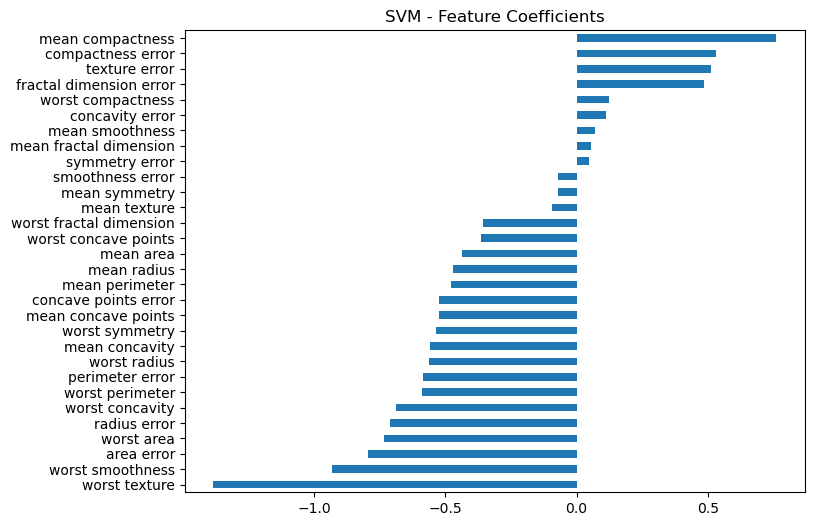

In [7]:
coef_svm = pd.Series(svm.coef_[0], index=X.columns)

print(coef_svm.sort_values(ascending=False).head(10))
print(coef_svm.sort_values().head(10))

coef_svm.sort_values().plot(kind="barh", figsize=(8,6), title="SVM - Feature Coefficients")
plt.show()

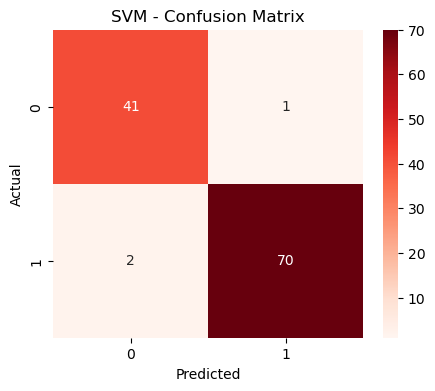

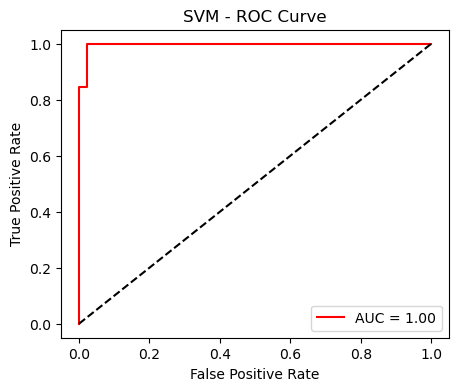

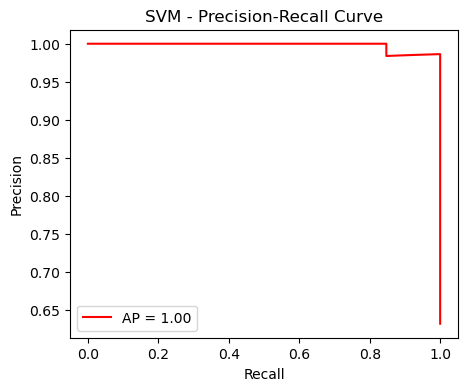

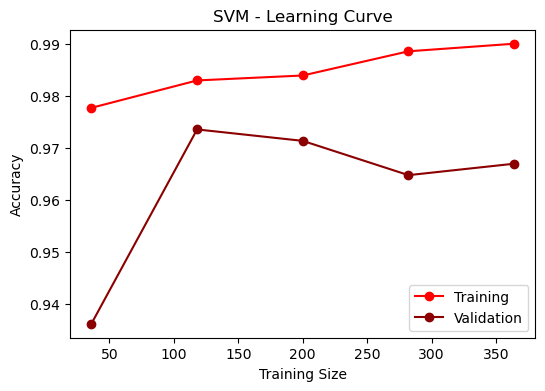

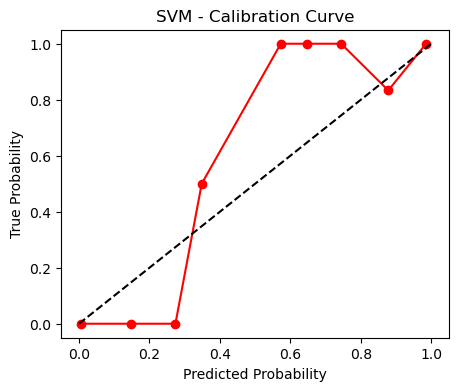

In [8]:
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.model_selection import learning_curve
from sklearn.calibration import calibration_curve

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Reds")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_svm)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="red")
plt.plot([0,1],[0,1],"k--")
plt.title("SVM - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba_svm)
ap = average_precision_score(y_test, y_proba_svm)
plt.figure(figsize=(5,4))
plt.plot(recall, precision, label=f"AP = {ap:.2f}", color="red")
plt.title("SVM - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    svm, X_train_scaled, y_train, cv=5, scoring="accuracy"
)
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training", color="red")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Validation", color="darkred")
plt.title("SVM - Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

prob_true, prob_pred = calibration_curve(y_test, y_proba_svm, n_bins=10)
plt.figure(figsize=(5,4))
plt.plot(prob_pred, prob_true, marker='o', color="red")
plt.plot([0,1],[0,1], 'k--')
plt.title("SVM - Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.show()
